In [1]:
import pandas as pd

# Load your data into a Pandas DataFrame
data = pd.read_csv('./magic+gamma+telescope/magic04.data', header=None)

# Manually define the feature names based on the descriptions provided
feature_names = [
    "fLength",  # major axis of ellipse [mm]
    "fWidth",   # minor axis of ellipse [mm] 
    "fSize",    # 10-log of sum of content of all pixels [in #phot]
    "fConc",    # ratio of sum of two highest pixels over fSize  [ratio]
    "fConc1",   # ratio of highest pixel over fSize  [ratio]
    "fAsym",    # distance from highest pixel to center, projected onto major axis [mm]
    "fM3Long",  # 3rd root of third moment along major axis  [mm] 
    "fM3Trans", # 3rd root of third moment along minor axis  [mm]
    "fAlpha",   # angle of major axis with vector to origin [deg]
    "fDist",    # distance from origin to center of ellipse [mm]
    "class"     # gamma (signal), hadron (background)
]

# Assign the feature names to the columns of your DataFrame
data.columns = feature_names

# Now your DataFrame should have column names based on the provided feature names
print(data.head())


    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Calculate Z-scores for each feature
z_scores = (data - data.mean()) / data.std()

# Define a threshold for outlier detection (e.g., z_score > 3 or z_score < -3)
threshold = 3

# Find outliers based on the threshold
outliers = (np.abs(z_scores) > threshold).any(axis=1)

# Print the indices of the outliers
print("Indices of outliers:")
print(np.where(outliers)[0])

Indices of outliers:
[    2   114   265 ... 19013 19018 19019]


C:\Users\soham\AppData\Local\Temp\ipykernel_5944\1902326396.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = (data - data.mean()) / data.std()
C:\Users\soham\AppData\Local\Temp\ipykernel_5944\1902326396.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = (data - data.mean()) / data.std()


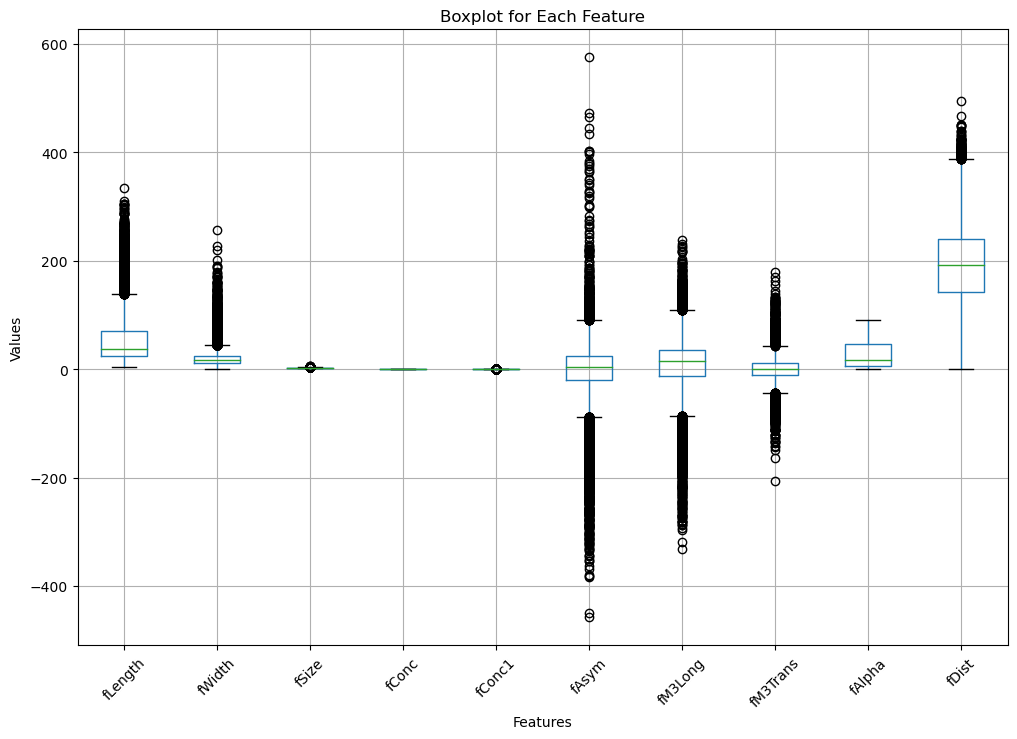

In [5]:
# Create boxplots for every feature
plt.figure(figsize=(12, 8))
data.boxplot()
plt.title('Boxplot for Each Feature')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

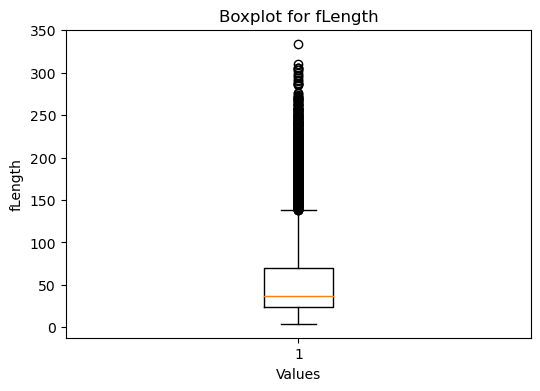

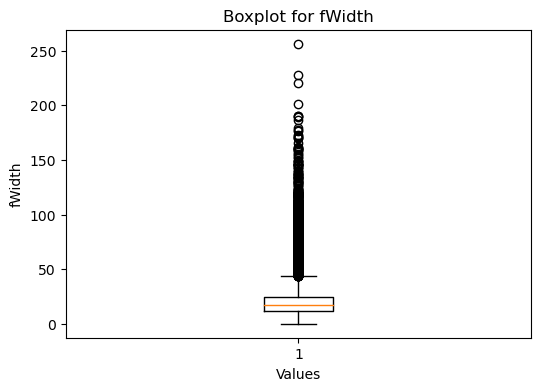

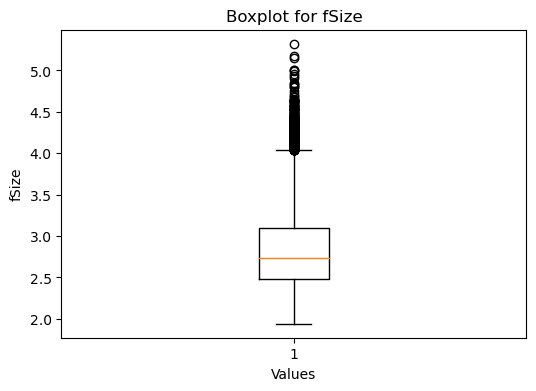

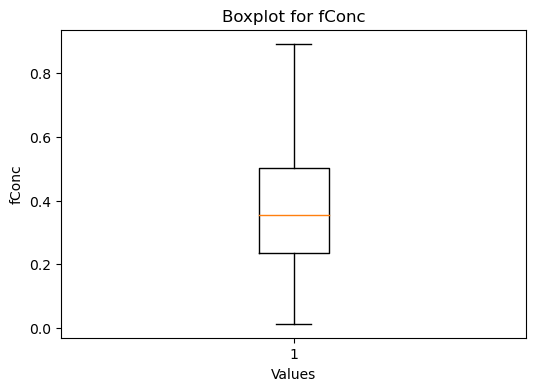

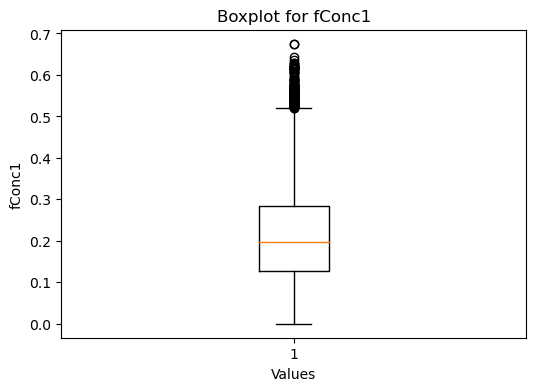

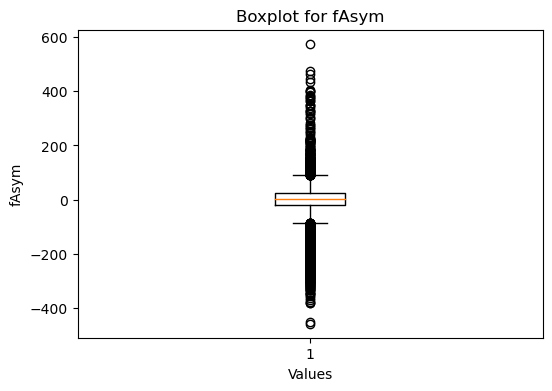

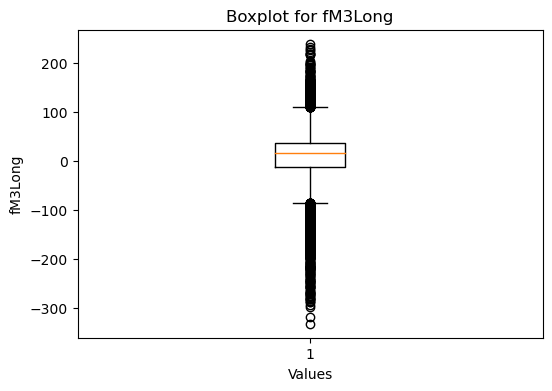

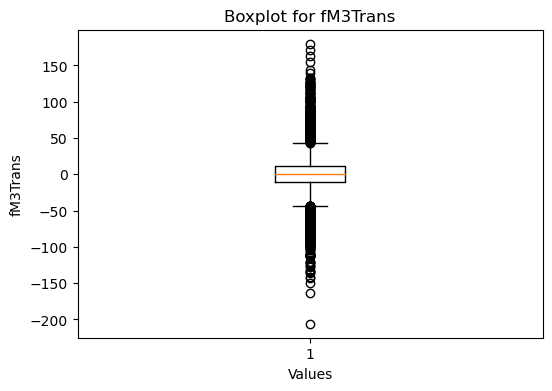

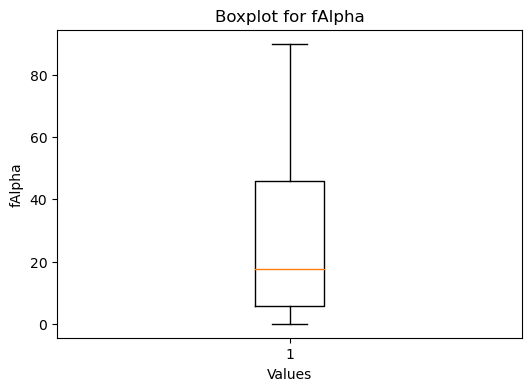

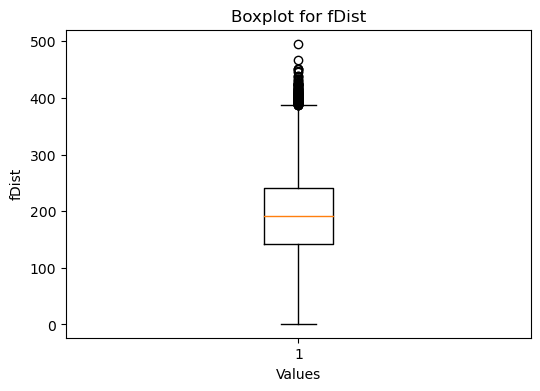

In [6]:
#Create a seperate boxplot for every feature
for column in data.columns:
    if column != 'class':
        plt.figure(figsize=(6, 4))
        plt.boxplot(data[column])
        plt.title(f'Boxplot for {column}')
        plt.xlabel('Values')
        plt.ylabel(column)
        plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#Data Prep
X = data.drop(columns=['class'])  # Features
y = data['class']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7894)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.785751840168244


In [7]:
from sklearn.svm import SVC

# Training the SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred_svm = svm.predict(X_test_scaled)

# Evaluating the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Classification Accuracy:", accuracy_svm)

SVM Classification Accuracy: 0.7854889589905363
